<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/MRL_tp_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install spotipy
!pip -q install -U librosa
!wget -q https://www.dropbox.com/s/nqjs076fidighaz/SopSax.NoVib.mf.C4B4.wav?dl=1 -O SopSax.NoVib.mf.C4B4.wav

     |████████████████████████████████| 184kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 


In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sns.set_context('poster')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Consigna 1:

Utilizando la API de Spotify se descargó la información de 4092 pistas de audio. Cada registro tiene variables de features de alto (*audio_features*), bajo nivel (*audio_analysis*) y metadata de los tracks. La idea es limpiar los campos a utilizar y hacer un primer análisis de los datos.

Para facilitar los primeros pasos utilizar una pequeña porción aleatoria de los datos e ir aumentando progresivamente. Observación: los datos de *audio_analysis* pesan 1.3 GB

# Dataset *tracks* 

-   De los datos de *tracks*, separar las etiquetas que se podrán utilizar para la validación externa (Artista, Álbum, Año, Género), de los campos que no se utilizarán.

# Dataset *audio_features*

El dataset *audio_features* contiene 9 atributos globales de alto nivel para cada pista de audio.

-   Con los datos de *audio_features*, generar un gráfico tipo *scatter matrix*.

-   Identificar variables más o menos informativas *a priori* y variables que requieran, además de la estandarización, alguna corrección para asimilar la distribución a una normal.

-   Estandarizar y volver a generar un gráfico tipo *scatter matrix*.

-   Identificar, si es que hay, valores extremos que sea necesario descartar.

# Dataset *audio_analysis*

El dataset *audio_analysis* contiene las variables continuas de bajo nivel, estimadas en ventanas temporales, como *timbre* o *pitches*. Como primer paso, deberán:

-   Resumir estas variables en valores por canción. Por ejemplo, tomar el promedio o el desvío estándar del timbre entre todas las ventanas, obteniendo 12 valores de timbre promedio y 12 valores de desvío estándar del timbre por canción.

-   Contruir un *data frame* con estos valores.

-   Generar un gráfico tipo *scatter matrix*.

-   Identificar variables más o menos informativas *a priori* y variables que requieran, además de la estandarización, alguna corrección para asimilar la distribución a una normal.

-   Estandarizar y volver a generar un gráfico tipo *scatter matrix*.

-   Identificar, si es que hay, valores extremos que sea necesario descartar.

## Bajamos los datos 



In [3]:
!wget https://www.dropbox.com/s/ms6260jqmsmz5qu/audio_features.pickle?dl=1 -O audio_features.pickle
!wget https://www.dropbox.com/s/8d0y9bms80ly8ui/tracks.pickle?dl=1 -O tracks.pickle
!wget https://www.dropbox.com/s/1cmb8e8zvv6hsfs/audio_analysis.pickle?dl=1 -O audio_analysis.pickle

--2020-09-27 18:06:59--  https://www.dropbox.com/s/ms6260jqmsmz5qu/audio_features.pickle?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ms6260jqmsmz5qu/audio_features.pickle [following]
--2020-09-27 18:07:00--  https://www.dropbox.com/s/dl/ms6260jqmsmz5qu/audio_features.pickle
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd96546f176f826a3abfa71a2c9.dl.dropboxusercontent.com/cd/0/get/BANLGXPgD_zosFKetgkiB-aNDdCUxiwYg4AXLW5U_9qlERNadwc-TTMS4QbQei-rt3lvqd0YXdR_NCXXw3fBYukxM-W9cbaKyk-xVxCpn-BUt19ruP2f_sYr-7muOnZzAWM/file?dl=1# [following]
--2020-09-27 18:07:00--  https://ucd96546f176f826a3abfa71a2c9.dl.dropboxusercontent.com/cd/0/get/BANLGXPgD_zosFKetgkiB-aNDdCUxiwYg4AXLW5U_9qlERNadwc-TTMS4QbQei-rt3lvqd0YXdR_NCXXw3

In [4]:
import pandas as pd
import numpy as np

In [8]:
df_af = pd.read_pickle('audio_features.pickle')
df_tracks = pd.read_pickle('tracks.pickle')
df_aa = pd.read_pickle('audio_analysis.pickle')

## Dataset *tracks* 

-   De los datos de *tracks*, separar las etiquetas que se podrán utilizar para la validación externa (Artista, Álbum, Año, Género), de los campos que no se utilizarán.



In [13]:
df_tracks.shape
# df_tracks tiene 4092 filas y 17 columnas

(4092, 17)

In [14]:
df_tracks.columns

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'name',
       'popularity', 'preview_url', 'track_number', 'type', 'uri', 'genre'],
      dtype='object')

Separamos las columnas artists, album, genre, faltaria la fecha


In [15]:
df_tracks1 = df_tracks.loc[:,['artists', 'album', 'genre']]
df_tracks1.head()


artists  ... genre
id                                                     ...      
4d3XHYFFuYYzxWr2cJ6yQl                 Tommy Flanagan  ...  jazz
3X3p3u03P8eFL8WTH0oaaU                     Art Farmer  ...  jazz
4KlXeaheot0OI9PoOWspvZ  Christian Scott aTunde Adjuah  ...  jazz
3j76McoUI18gDoqxYE14Bu                        Skalpel  ...  jazz
4zxd4tiXPlWMqoJltbVTbE                    Miles Davis  ...  jazz

[5 rows x 3 columns]

Averiguamos si la fecha puede estar contenida en alguna de las columnas, empezamos por album.

In [16]:
from pandas.io.json import json_normalize

In [150]:
d = df_tracks1['album']
df = json_normalize(d)
df.columns
# print (df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


Index(['album_type', 'artists', 'available_markets', 'href', 'id', 'images',
       'name', 'release_date', 'release_date_precision', 'total_tracks',
       'type', 'uri', 'external_urls.spotify'],
      dtype='object')

In [18]:
df[['release_date','release_date_precision']].head()

release_date release_date_precision
0         1991                   year
1         1958                   year
2   2014-01-01                    day
3   2014-11-10                    day
4   1959-08-17                    day

In [118]:
def get_anio(pfecha):
    """obtiene anio del parametro pfecha"""
    if '-' in pfecha:
       res = pd.to_datetime(pfecha, format = '%Y-%m-%d').year
    elif int(pfecha)>0:
       res = pfecha
    else:
      res = 0
    return int(res)  



In [21]:
def date_formator(date):
    """obtiene el año de la fecha, funcion del profe Pablo"""
    if '-' in date:
        year = pd.to_datetime(date, format = '%Y-%m-%d').year
        return int(year)
    elif int(date)>0:
        year = pd.to_datetime(date, format = '%Y').year
        return int(year)
    return None

In [37]:
df.columns

Index(['album_type', 'artists', 'available_markets', 'href', 'id', 'images',
       'name', 'release_date', 'release_date_precision', 'total_tracks',
       'type', 'uri', 'external_urls.spotify'],
      dtype='object')

Probamos la funcion get_anio para ver si obtiene el resultado esperado.


In [120]:

#df['release_date'].apply(date_formator)
df['release_date'].apply(get_anio)



0       1991
1       1958
2       2014
3       2014
4       1959
        ... 
4087    2011
4088    2012
4089    2009
4090    2008
4091    2010
Name: release_date, Length: 4092, dtype: int64

Vemos como obtener la columna realese_date, del data_tracks directamente:

In [154]:
df_tracks1['release_date'] = df_tracks1['album'].map(lambda x: x['release_date'])

In [153]:
df_tracks1['album_name'] = df_tracks1['album'].map(lambda x: x['name'])

In [155]:
df_tracks1['release_date'].head()

id
4d3XHYFFuYYzxWr2cJ6yQl          1991
3X3p3u03P8eFL8WTH0oaaU          1958
4KlXeaheot0OI9PoOWspvZ    2014-01-01
3j76McoUI18gDoqxYE14Bu    2014-11-10
4zxd4tiXPlWMqoJltbVTbE    1959-08-17
Name: release_date, dtype: object

In [156]:
df_tracks1['fecha'] = df_tracks1['release_date'].apply(get_anio)

In [157]:
df_tracks1['fecha'].unique()

array([1991, 1958, 2014, 1959, 2011, 1963, 2001, 1966, 2003, 1993, 2015,
       1956, 1988, 2008, 1965, 2012, 1994, 1980, 1968, 1995, 1999, 1962,
       1970, 1990, 2002, 1997, 2000, 2004, 1960, 1986, 1964, 2007, 1996,
       1951, 1984, 1961, 1957, 1987, 1975, 1974, 1949, 1977, 1976, 2013,
       1992, 1982, 1998, 1972, 2009, 1971, 1955, 2005, 1954, 2010, 1989,
       2006, 1933, 1983, 1979, 1969, 1927, 1973, 1978, 1939, 1985, 1967,
       1930, 1981,    0])

In [ ]:
a = df['A'].drop_duplicates()
a.sort()

In [158]:
df_tracks1.columns

Index(['artists', 'album', 'genre', 'release_date', 'fecha', 'album_name'], dtype='object')

In [160]:
df_tracks_final = df_tracks1.loc[:,['artists', 'album', 'genre', 'album_name', 'fecha']]
df_tracks_final.head()

artists  ... fecha
id                                                     ...      
4d3XHYFFuYYzxWr2cJ6yQl                 Tommy Flanagan  ...  1991
3X3p3u03P8eFL8WTH0oaaU                     Art Farmer  ...  1958
4KlXeaheot0OI9PoOWspvZ  Christian Scott aTunde Adjuah  ...  2014
3j76McoUI18gDoqxYE14Bu                        Skalpel  ...  2014
4zxd4tiXPlWMqoJltbVTbE                    Miles Davis  ...  1959

[5 rows x 5 columns]

In [161]:
df_tracks_final[df_tracks_final['fecha']==0]


artists  ... fecha
id                                      ...      
2qij1qbQCOkjB8gsu3Y5lH    Super8 & Tab  ...     0
0gAD3qvhN777Izfn3sRjiN    Super8 & Tab  ...     0
5tmXe6SOpaA2KnNoBgI42R  Above & Beyond  ...     0

[3 rows x 5 columns]

In [166]:
df_tracks1.columns
df_tracks1[df_tracks1['fecha'] == 0]


artists  ...                                    album_name
id                                      ...                                              
2qij1qbQCOkjB8gsu3Y5lH    Super8 & Tab  ...                       Black Is The New Yellow
0gAD3qvhN777Izfn3sRjiN    Super8 & Tab  ...  Above & Beyond Presents Anjunabeats Volume 5
5tmXe6SOpaA2KnNoBgI42R  Above & Beyond  ...  Above & Beyond Presents Anjunabeats Volume 5

[3 rows x 6 columns]

In [172]:
## df_tracks1[df_tracks1['fecha'] == 0 df_tracks1['album_name'] == 'Above & Beyond Presents Anjunabeats Volume 5']
## 

## Dataset *audio_features*

El dataset *audio_features* contiene atributos globales de alto nivel para cada pista de audio.

-   Con los datos de *audio_features*, generar un gráfico tipo *scatter matrix*.

-   Identificar variables más o menos informativas *a priori* y variables que requieran, además de la estandarización, alguna corrección para asimilar la distribución a una normal.

-   Estandarizar y volver a generar un gráfico tipo *scatter matrix*.

-   Identificar, si es que hay, valores extremos que sea necesario descartar.


In [29]:
df_af.head
df_af.shape
df_af.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

Constuimos el scatter matrix, para todos los atributos asociados a las features

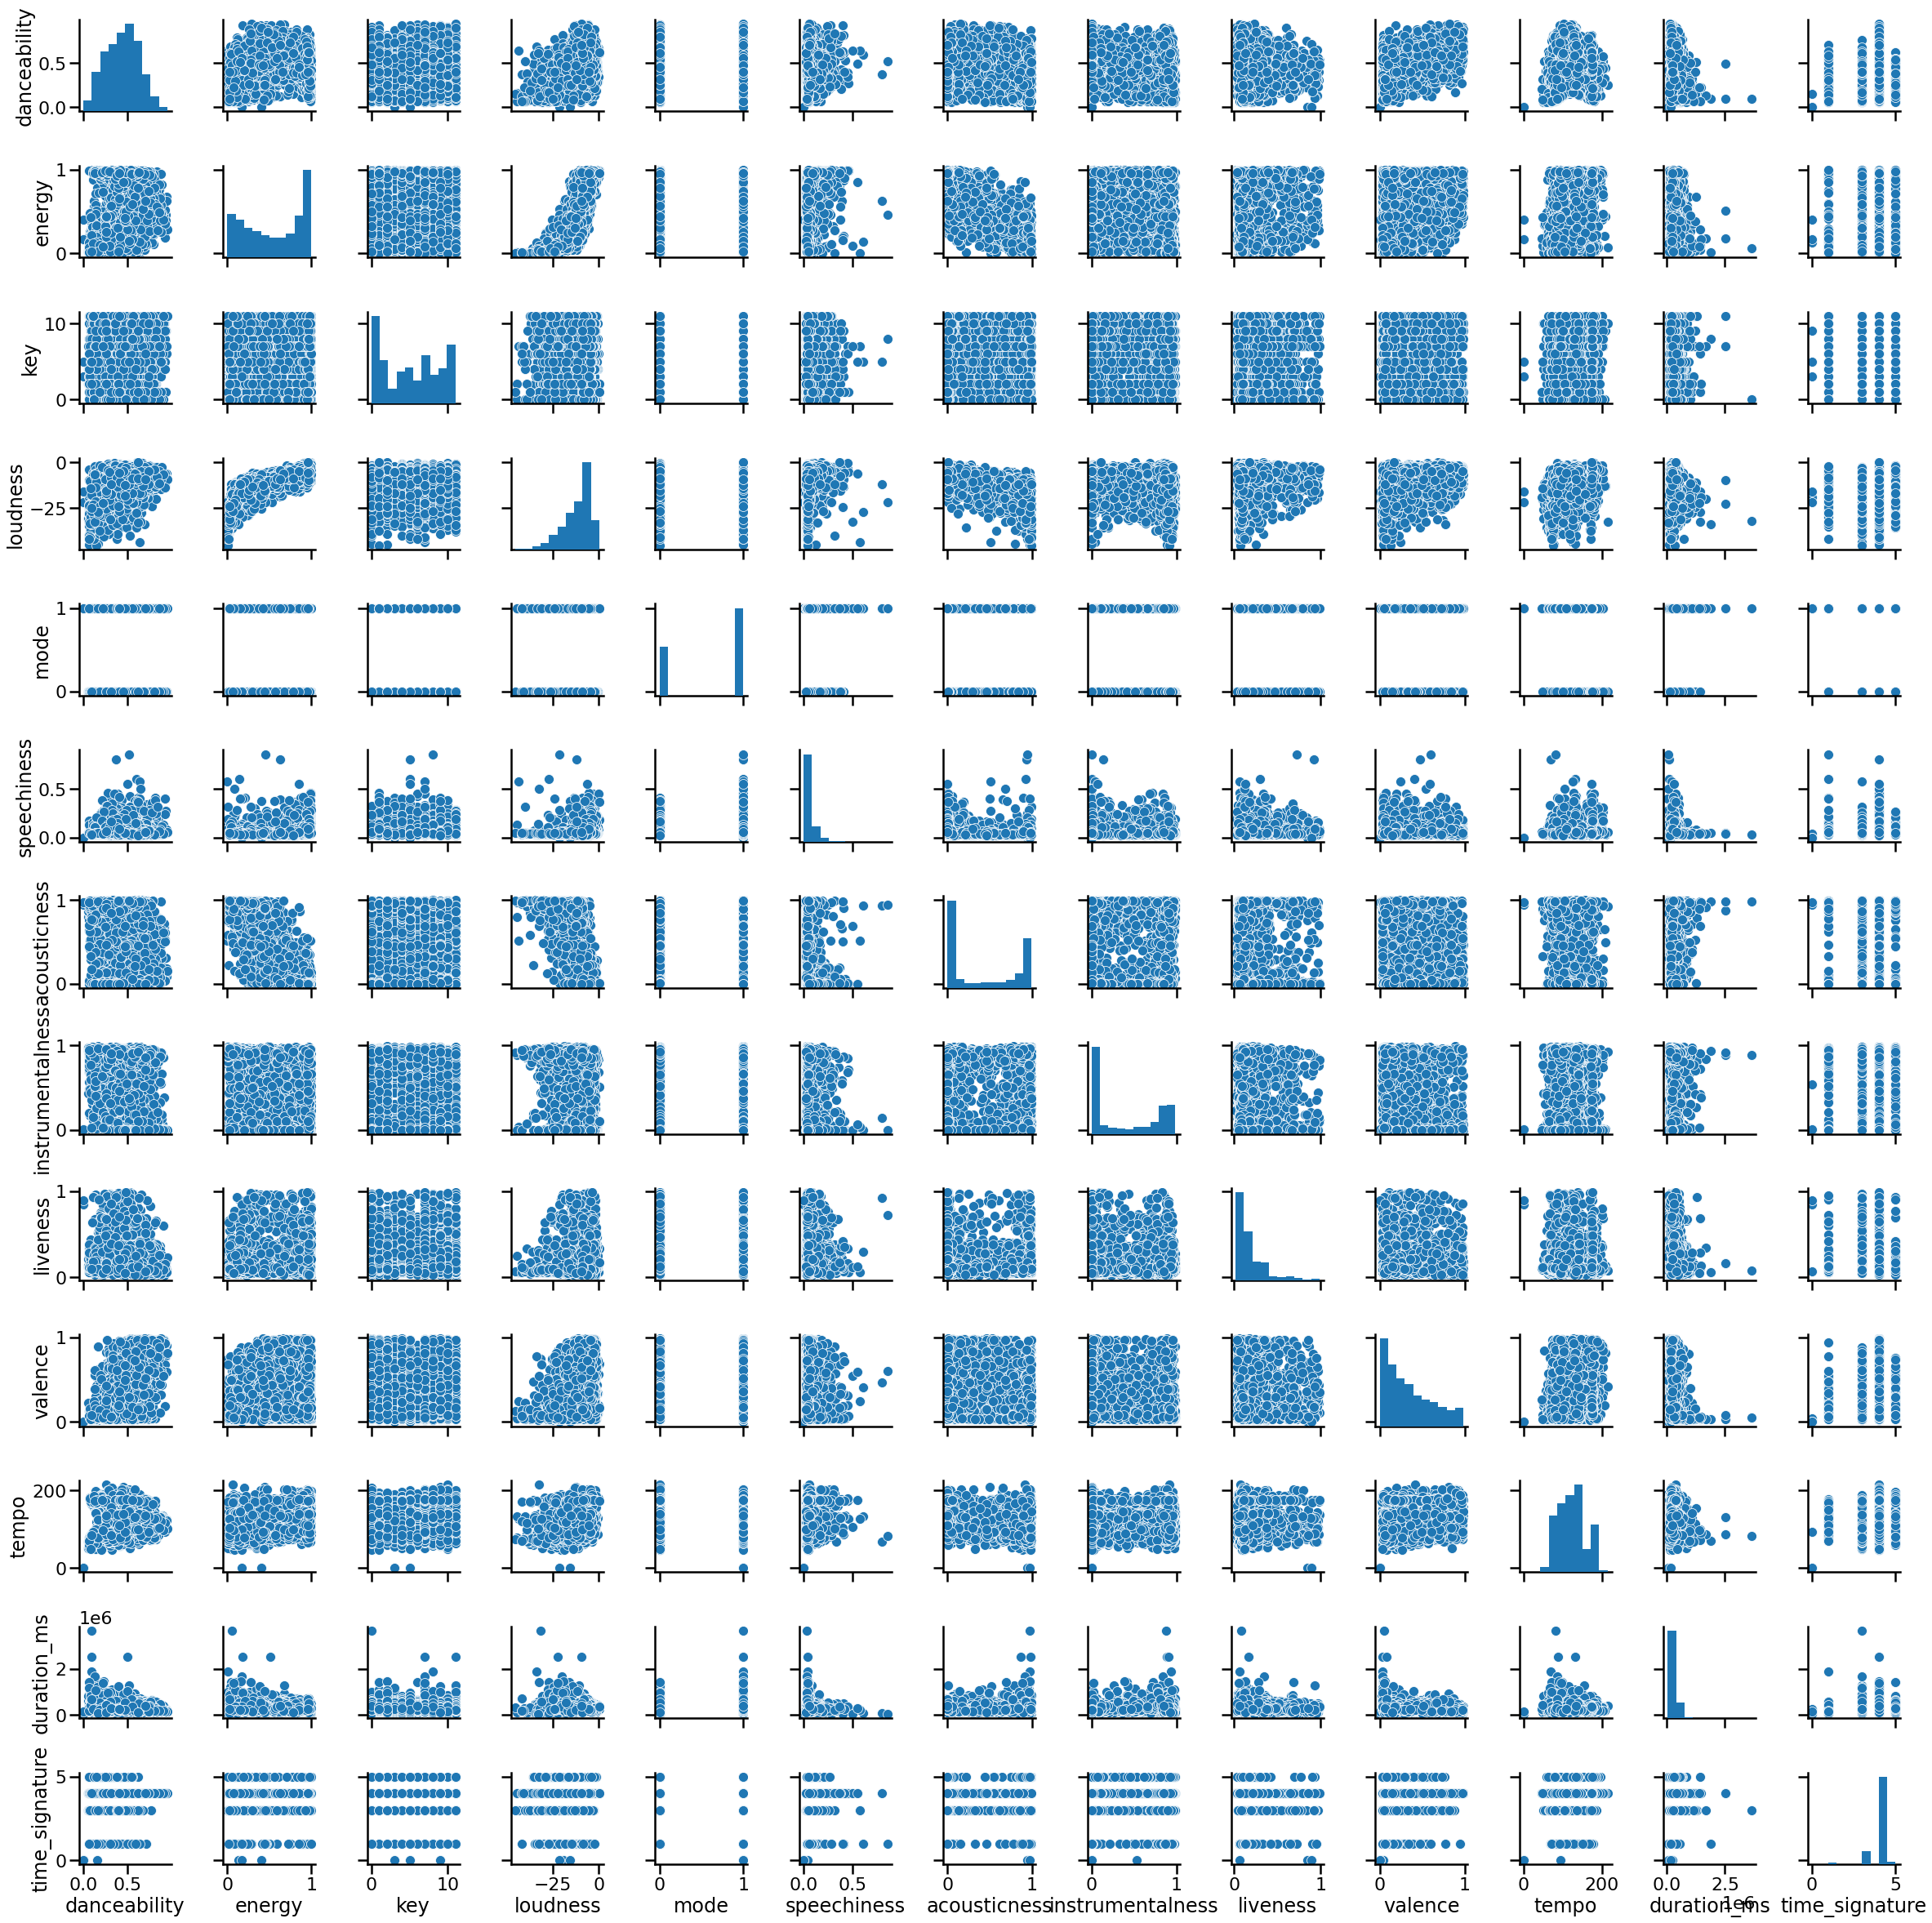

In [31]:
#sns.pairplot(pd.concat([X_features,df_tracks.set_index('id')['artist_name']],axis=1),hue='artist_name');
sns.pairplot(df_af);


In [32]:
df_af.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [33]:
df_af.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

Separamos el los atributos segun el tipo de los mismos, para analizar cada uno de los grupos


In [37]:
df_af_float = df_af.loc[:, ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_af_int = df_af.loc[:,['key', 'mode', 'time_signature']]
df_af_object = df_af.loc[:,['type', 'uri', 'track_href', 'analysis_url']]

Relaizamos la matriz de scatter plot solo para los atributos numericos, aqui solo vamos a considerar los que tienen valores reales y no numericos enteros.

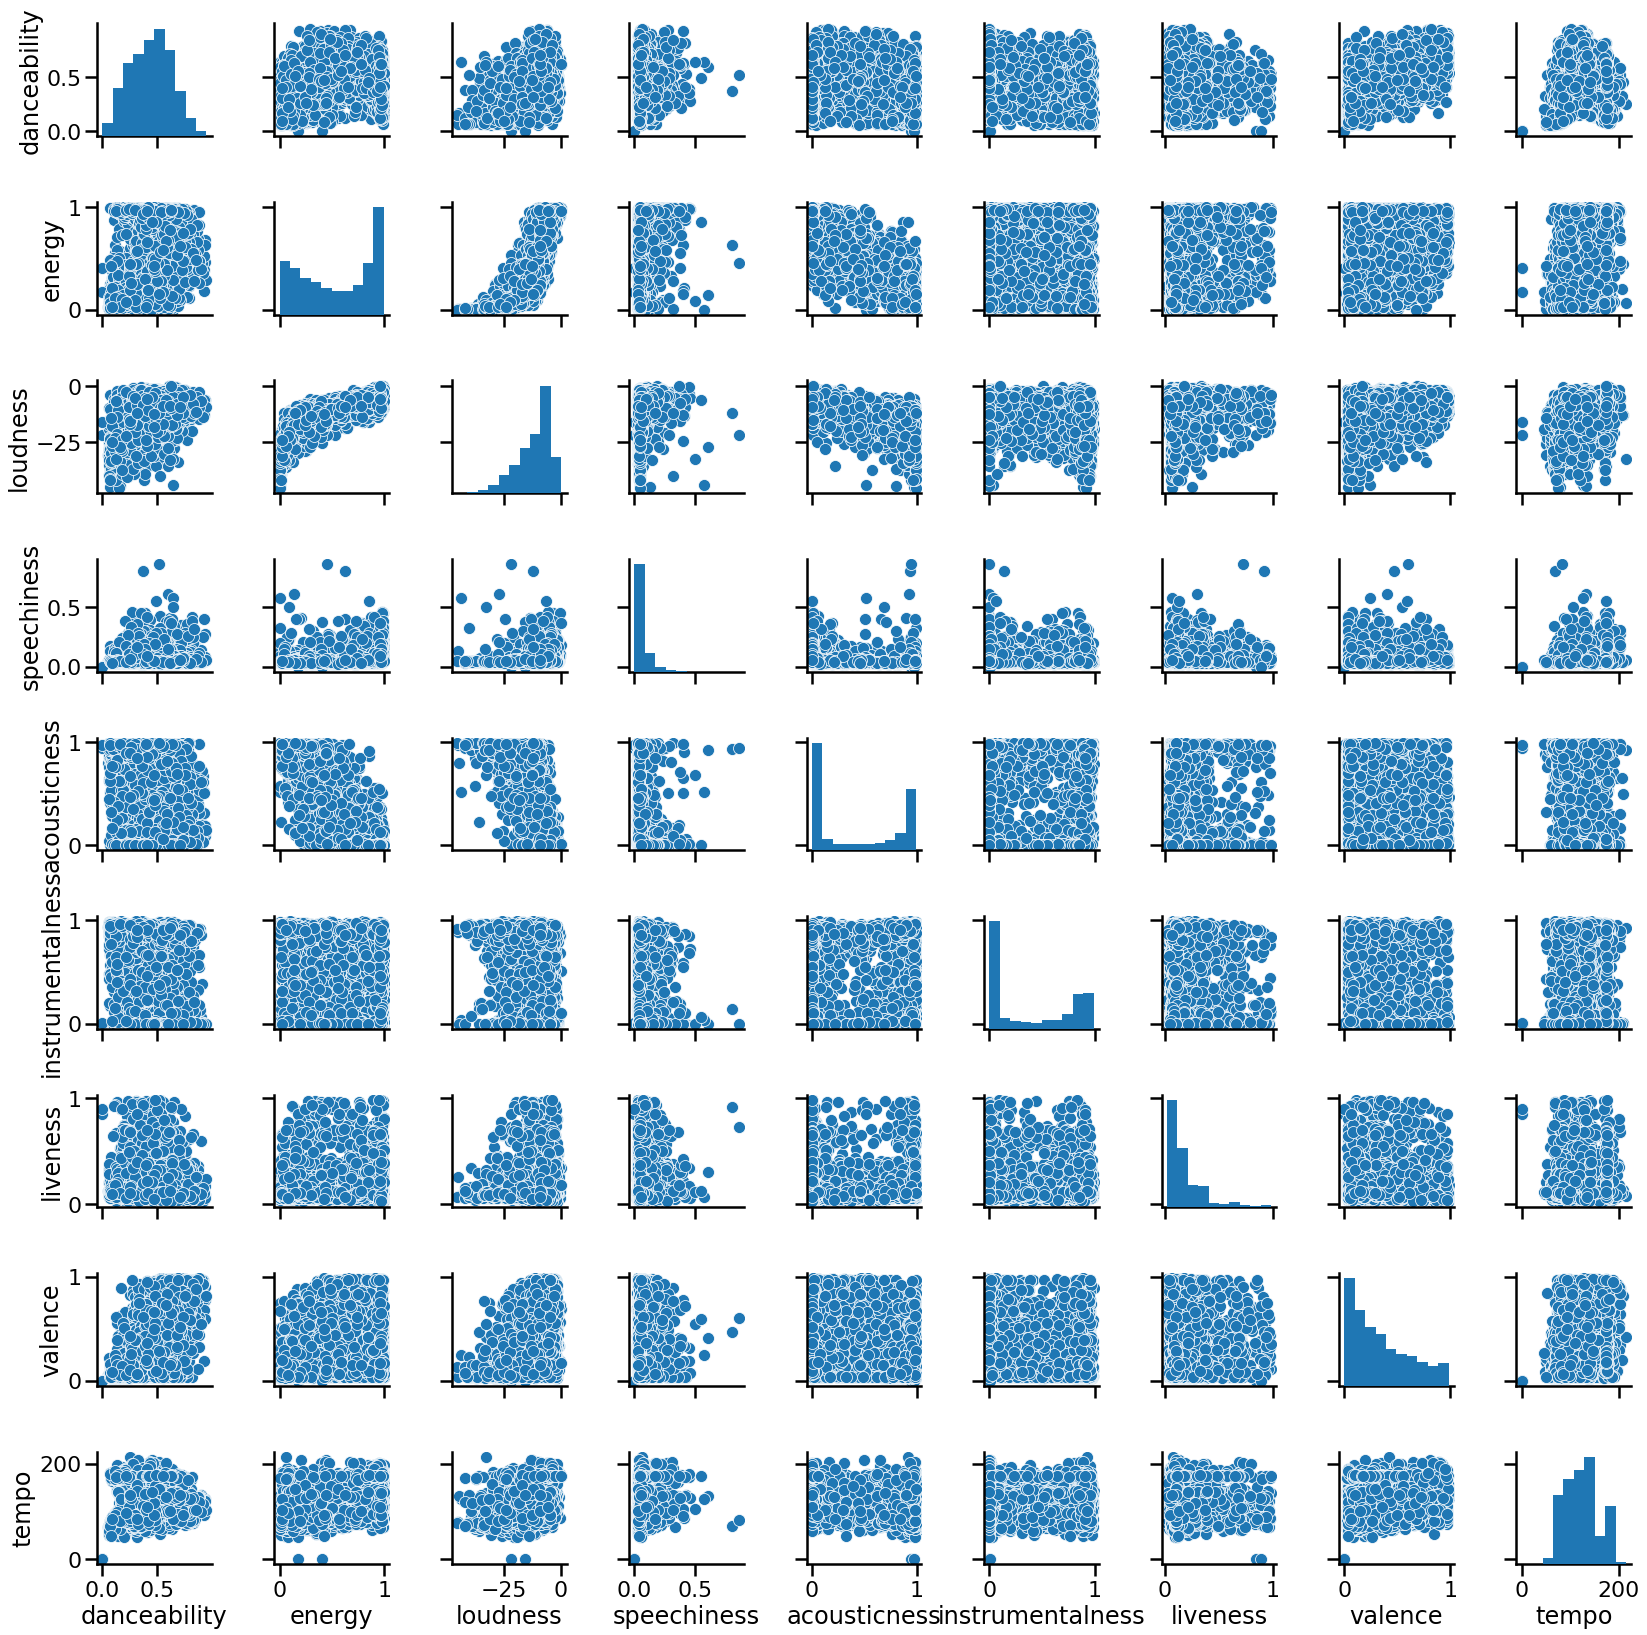

In [38]:
sns.pairplot(df_af_float);


Analicemos la distribucion de los atributos segun el resultado obtenido en el scatter plot:


*   danceability: normal
*   energy: forma de U
*   loudness: forma exponencial
*   speechiness: forma logaritmica
*   acousticness: forma de U
*   instrumentalness: forma de U (analizar correlacion con acousticness)
*   liveness: forma logaritmica
*   valence: forma logaritmica
*   tempo: parecida a la normal, jugar con bins


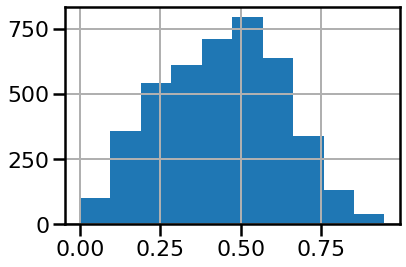

In [49]:
df_af_float['danceability'].hist(bins=10)

In [45]:
dt_af_valence = np.log10(df_af_float['valence'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [175]:
epsilon = np.e**(-10)
print(epsilon)

4.5399929762484875e-05


In [176]:
def u_to_norm(x):
    """convierte distribucion en U en normal"""
    
    if abs(x) <= epsilon:
      if x > 0:
        x = x + epsilon*2
      else: 
        x = x - epsilon*2
    elif abs(x - 1) <= epsilon: 
      if x > 1:
        x = x + epsilon*2
      else:
        x = x - epsilon*2
    else: 
      pass
    return np.log(1/((1/x)-1))

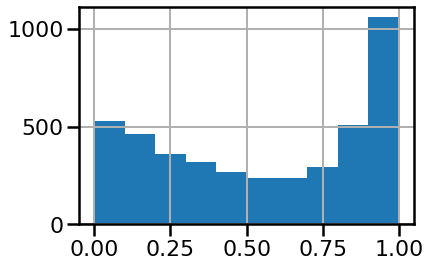

In [177]:
df_af_float['energy'].hist()

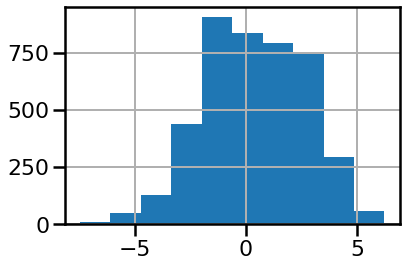

In [178]:
df_af_enery2 = df_af_float['energy'].apply(u_to_norm)
df_af_enery2.hist(bins=10)


In [80]:
from scipy.stats import boxcox

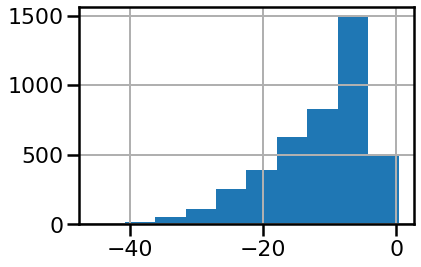

In [179]:
df_af_float['loudness'].hist()

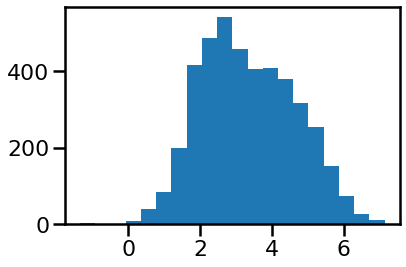

In [185]:
df_aux = boxcox(abs(df_af_float['loudness'].to_numpy()), 0.3)
plt.hist(df_aux, bins=20)
plt.show()

In [197]:
#df_af['speechiness'].hist(bins=10)
df_af['speechiness'].unique()

array([0.125 , 0.0402, 0.0401, 0.0318, 0.148 , 0.0424, 0.0377, 0.047 ,
       0.0504, 0.15  , 0.0528, 0.0257, 0.0497, 0.116 , 0.056 , 0.0426,
       0.0469, 0.0448, 0.0729, 0.124 , 0.034 , 0.0357, 0.317 , 0.0542,
       0.0488, 0.0376, 0.0304, 0.0382, 0.0498, 0.0389, 0.0583, 0.0535,
       0.108 , 0.0843, 0.033 , 0.103 , 0.0511, 0.0602, 0.0546, 0.037 ,
       0.0328, 0.0337, 0.0347, 0.395 , 0.0365, 0.046 , 0.105 , 0.177 ,
       0.0331, 0.031 , 0.0431, 0.0467, 0.0695, 0.0446, 0.109 , 0.0494,
       0.18  , 0.0697, 0.0871, 0.0569, 0.072 , 0.0454, 0.0459, 0.129 ,
       0.0352, 0.0355, 0.0353, 0.0708, 0.0512, 0.0341, 0.0408, 0.0421,
       0.231 , 0.0358, 0.0388, 0.0593, 0.0648, 0.173 , 0.098 , 0.0348,
       0.0576, 0.0457, 0.422 , 0.0491, 0.303 , 0.065 , 0.0413, 0.0381,
       0.165 , 0.0696, 0.0329, 0.0378, 0.106 , 0.0453, 0.0474, 0.0544,
       0.0317, 0.0339, 0.0406, 0.0411, 0.263 , 0.0343, 0.0283, 0.0369,
       0.0384, 0.355 , 0.0664, 0.0818, 0.112 , 0.0262, 0.0404, 0.0484,
      

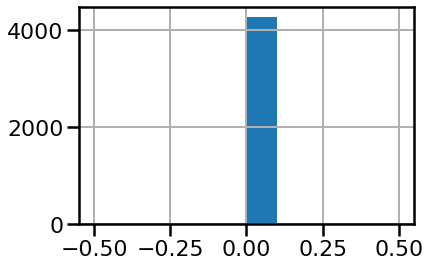

In [193]:
(df_af['speechiness']+epsilon).apply(np.long).hist(bins=10)

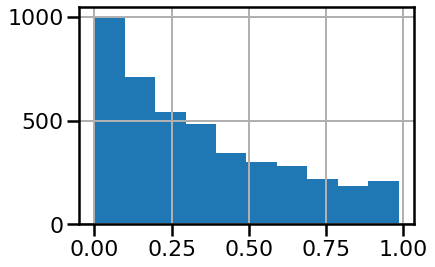

In [198]:
df_af['valence'].hist()

In [229]:
def inv_sqrt(x):
  """inversa de la raiz cuadrada"""
  if abs(x + epsilon) < 0:
    res = 0
  else: 
    res = 1/np.sqrt(x)
  return res
    

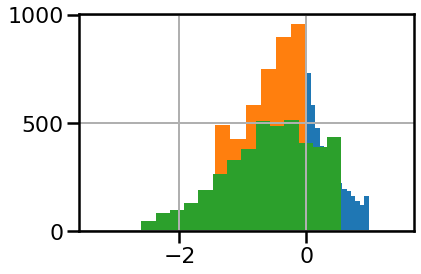

In [245]:
#df_aux = (df_af['valence']+epsilon).apply(np.log)
#df_aux = (df_af['valence']+epsilon).apply(inv_sqrt)
#df_aux = (df_af['valence']+epsilon).apply(np.sqrt)
#df_aux.hist(bins = 8)
df_af['valence'].hist(bins=14)
df_aux = (df_af['valence']+10*epsilon).apply(np.log10)
df_aux.hist(bins = 14)
df_aux = boxcox(abs(df_aux.to_numpy()), 0.3)
plt.hist(df_aux, bins=18)
plt.show()
#df_aux.hist(bins=12)

In [248]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_af_float)
df_af_scale = pd.DataFrame(scaled_df,columns=df_af_float.columns)
df_af_scale.head()

danceability    energy  loudness  ...  liveness   valence     tempo
0      0.638478  0.964909  0.891774  ...  0.060299  0.279188  0.801047
1      0.071564  0.057668  0.431571  ...  0.101704  0.037766  0.342310
2      0.273784  0.242044  0.647499  ...  0.054621  0.309645  0.829509
3      0.255814  0.445569  0.830552  ...  0.172948  0.088020  0.401823
4      0.741015  0.807503  0.872394  ...  0.107899  0.989848  0.685235

[5 rows x 9 columns]

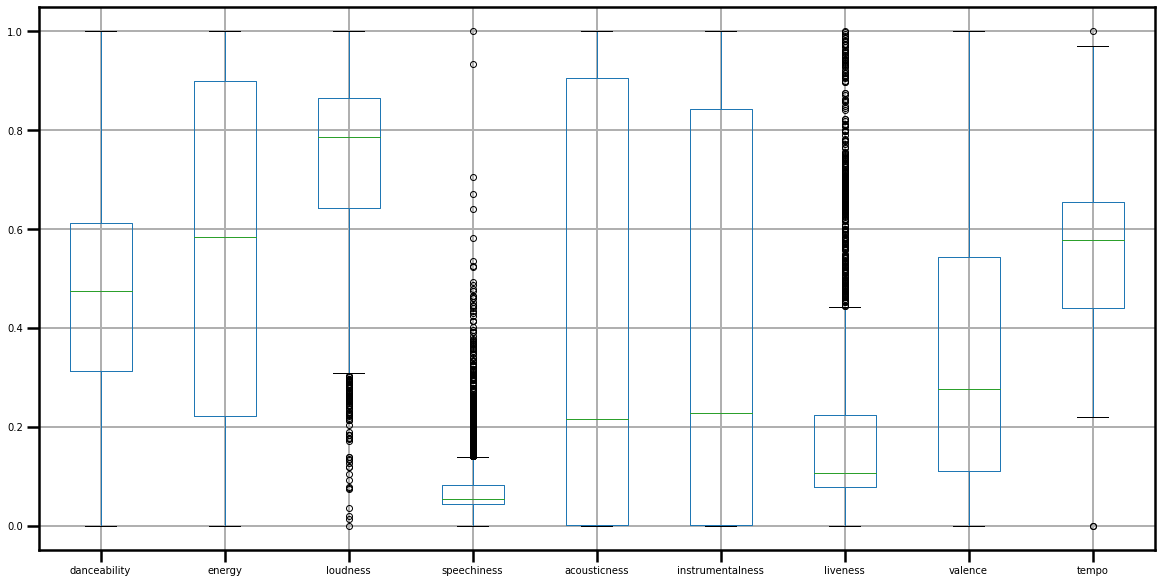

In [251]:
#df_af_scale.boxplot()
df_af_scale.boxplot(fontsize=10,grid=True, figsize=(20,10))

In [252]:
def pre(x):
  return (1/((np.e**x) + 1))

## Dataset *audio_analysis*

El dataset *audio_analysis* contiene las variables continuas de bajo nivel, estimadas en ventanas temporales, como *timbre* o *pitches*. Como primer paso, deberán:

-   Resumir estas variables en valores por canción. Por ejemplo, tomar el promedio o el desvío estándar del timbre entre todas las ventanas, obteniendo 12 valores de timbre promedio y 12 valores de desvío estándar del timbre por canción.

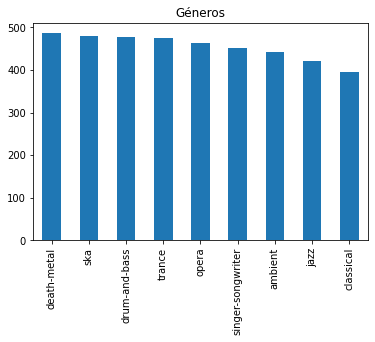

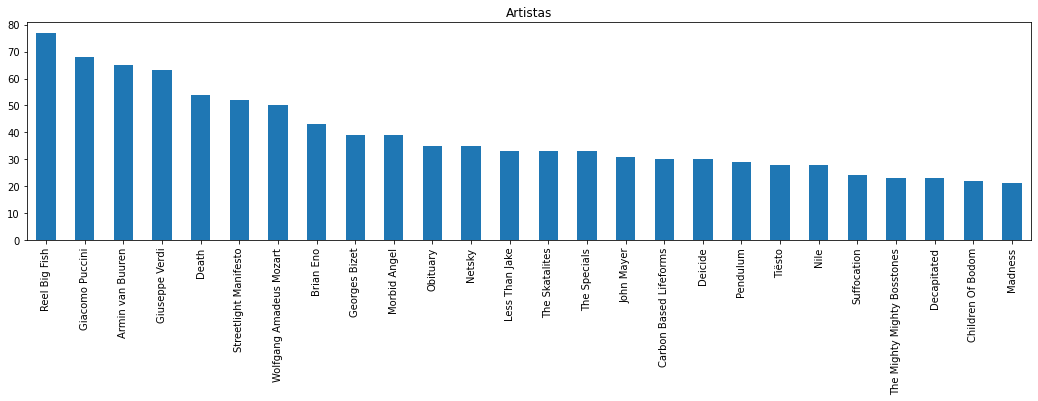

In [ ]:
import matplotlib.pyplot as plt
df_tracks['genre'].value_counts().plot.bar(figsize=(6,4));
plt.title('Géneros')
plt.show()
df_tracks['artists'].value_counts()[:26].plot.bar(figsize=(18,4));
plt.title('Artistas');

Dataset tracks
De los datos de tracks, separar las etiquetas que se podrán utilizar para la validación externa (Artista, Álbum, Año, Género), de los campos que no se utilizarán.

In [ ]:
df_tracks.head()

album  ... genre
id                                                                         ...      
4d3XHYFFuYYzxWr2cJ6yQl  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
3X3p3u03P8eFL8WTH0oaaU  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
4KlXeaheot0OI9PoOWspvZ  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
3j76McoUI18gDoqxYE14Bu  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz
4zxd4tiXPlWMqoJltbVTbE  {'album_type': 'ALBUM', 'artists': [{'external...  ...  jazz

[5 rows x 17 columns]

In [ ]:
df_tracks.columns

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'name',
       'popularity', 'preview_url', 'track_number', 'type', 'uri', 'genre'],
      dtype='object')

In [ ]:
df_tracks['release_date'] = df_tracks['album'].map(lambda x: x['release_date'])
df_tracks['release_date']

id
4d3XHYFFuYYzxWr2cJ6yQl          1991
3X3p3u03P8eFL8WTH0oaaU          1958
4KlXeaheot0OI9PoOWspvZ    2014-01-01
3j76McoUI18gDoqxYE14Bu    2014-11-10
4zxd4tiXPlWMqoJltbVTbE    1959-08-17
                             ...    
5vSsQH8wH68PDKJbNfxzpc    2011-03-21
7xYKAlU77jAAnAixQ5IgSn    2012-07-20
4hXEgyy5nNgdiBvJcJ9o8u    2009-02-23
4HpSbJgNpoOphIeCK3z9sk    2008-08-25
30KzbX1viF0aTL1NS5coDY    2010-07-19
Name: release_date, Length: 4092, dtype: object

In [ ]:
def date_formator(date):
    if '-' in date:
        year = pd.to_datetime(date, format = '%Y-%m-%d').year
        return int(year)
    elif int(date)>0:
        year = pd.to_datetime(date, format = '%Y').year
        return int(year)
    return None
       
df_tracks['release_date'] = df_tracks['release_date'].apply(date_formator)
df_tracks['release_date']

id
4d3XHYFFuYYzxWr2cJ6yQl    1991.0
3X3p3u03P8eFL8WTH0oaaU    1958.0
4KlXeaheot0OI9PoOWspvZ    2014.0
3j76McoUI18gDoqxYE14Bu    2014.0
4zxd4tiXPlWMqoJltbVTbE    1959.0
                           ...  
5vSsQH8wH68PDKJbNfxzpc    2011.0
7xYKAlU77jAAnAixQ5IgSn    2012.0
4hXEgyy5nNgdiBvJcJ9o8u    2009.0
4HpSbJgNpoOphIeCK3z9sk    2008.0
30KzbX1viF0aTL1NS5coDY    2010.0
Name: release_date, Length: 4092, dtype: float64

In [ ]:
#album=df2['album'].apply(pd.Series)
#album.head()

album_type  ...                                   uri
id                                 ...                                      
4d3XHYFFuYYzxWr2cJ6yQl      ALBUM  ...  spotify:album:0O6FZJtO0RcQEDu3t55vF4
3X3p3u03P8eFL8WTH0oaaU      ALBUM  ...  spotify:album:35GC6fz2v6ZoXcVlKf6BA6
4KlXeaheot0OI9PoOWspvZ      ALBUM  ...  spotify:album:72mQPtb0Xzv71uhsznTUK4
3j76McoUI18gDoqxYE14Bu      ALBUM  ...  spotify:album:5hUjimESHfgftKXaM5nk7E
4zxd4tiXPlWMqoJltbVTbE      ALBUM  ...  spotify:album:4sb0eMpDn3upAFfyi4q2rw

[5 rows x 13 columns]

In [ ]:
df_tracks.head()

album  ... release_date
id                                                                         ...             
4d3XHYFFuYYzxWr2cJ6yQl  {'album_type': 'ALBUM', 'artists': [{'external...  ...       1991.0
3X3p3u03P8eFL8WTH0oaaU  {'album_type': 'ALBUM', 'artists': [{'external...  ...       1958.0
4KlXeaheot0OI9PoOWspvZ  {'album_type': 'ALBUM', 'artists': [{'external...  ...       2014.0
3j76McoUI18gDoqxYE14Bu  {'album_type': 'ALBUM', 'artists': [{'external...  ...       2014.0
4zxd4tiXPlWMqoJltbVTbE  {'album_type': 'ALBUM', 'artists': [{'external...  ...       1959.0

[5 rows x 18 columns]

In [ ]:
df2 = df_tracks.loc[:,['artists','album','genre','release_date']]
df2.head()

artists  ... release_date
id                                                     ...             
4d3XHYFFuYYzxWr2cJ6yQl                 Tommy Flanagan  ...       1991.0
3X3p3u03P8eFL8WTH0oaaU                     Art Farmer  ...       1958.0
4KlXeaheot0OI9PoOWspvZ  Christian Scott aTunde Adjuah  ...       2014.0
3j76McoUI18gDoqxYE14Bu                        Skalpel  ...       2014.0
4zxd4tiXPlWMqoJltbVTbE                    Miles Davis  ...       1959.0

[5 rows x 4 columns]

In [ ]:
df2.describe()

release_date
count   4089.000000
mean    2002.608706
std       12.462919
min     1927.000000
25%     1998.000000
50%     2007.000000
75%     2011.000000
max     2015.000000

In [ ]:
df2.info (verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4092 entries, 4d3XHYFFuYYzxWr2cJ6yQl to 30KzbX1viF0aTL1NS5coDY
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artists       4092 non-null   object 
 1   album         4092 non-null   object 
 2   genre         4092 non-null   object 
 3   release_date  4089 non-null   float64
dtypes: float64(1), object(3)
memory usage: 319.8+ KB


In [ ]:
df_af.shape

(4270, 17)

In [ ]:
df_tracks.shape

(4092, 17)

In [ ]:
df_aa.shape

(4504350, 10)

In [ ]:
df_af.head()

danceability  energy  ...  duration_ms  time_signature
id                                            ...                             
6avAsaa2IsXHT2mtQ6cGVe        0.6040  0.9630  ...       388663               4
6fvu2d6gHAdiNCMco4lTxK        0.0677  0.0581  ...       283653               3
5GmrXcVIMgLaaqKVxhi5kp        0.2590  0.2420  ...       213640               3
1DMIHggF47tqsO468VUDmd        0.2420  0.4450  ...       247933               4
78Ovt1QkZbU1QBMKWpcXPy        0.7010  0.8060  ...       168112               4

[5 rows x 17 columns]

In [ ]:
df_af.describe()

danceability       energy  ...   duration_ms  time_signature
count   4270.000000  4270.000000  ...  4.270000e+03     4270.000000
mean       0.441164     0.553732  ...  2.906830e+05        3.846838
std        0.185640     0.339423  ...  1.617286e+05        0.536735
min        0.000000     0.000581  ...  3.070700e+04        0.000000
25%        0.296000     0.222000  ...  1.968935e+05        4.000000
50%        0.450000     0.583500  ...  2.574265e+05        4.000000
75%        0.580000     0.897000  ...  3.421465e+05        4.000000
max        0.946000     0.998000  ...  3.650800e+06        5.000000

[8 rows x 13 columns]

In [ ]:
df_af.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4270 entries, 6avAsaa2IsXHT2mtQ6cGVe to 4hdM3HKSCrdVK0hezMn1RL
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4270 non-null   float64
 1   energy            4270 non-null   float64
 2   key               4270 non-null   int64  
 3   loudness          4270 non-null   float64
 4   mode              4270 non-null   int64  
 5   speechiness       4270 non-null   float64
 6   acousticness      4270 non-null   float64
 7   instrumentalness  4270 non-null   float64
 8   liveness          4270 non-null   float64
 9   valence           4270 non-null   float64
 10  tempo             4270 non-null   float64
 11  type              4270 non-null   object 
 12  uri               4270 non-null   object 
 13  track_href        4270 non-null   object 
 14  analysis_url      4270 non-null   object 
 15  duration_ms       4270 non-null   int64  
 16  time_sig

In [ ]:
X_features = df_af.iloc[:,[0,1,3,5,6,7,8,9,10]]
X_features.head()

danceability  energy  ...  valence    tempo
id                                            ...                  
6avAsaa2IsXHT2mtQ6cGVe        0.6040  0.9630  ...   0.2750  172.020
6fvu2d6gHAdiNCMco4lTxK        0.0677  0.0581  ...   0.0372   73.509
5GmrXcVIMgLaaqKVxhi5kp        0.2590  0.2420  ...   0.3050  178.132
1DMIHggF47tqsO468VUDmd        0.2420  0.4450  ...   0.0867   86.289
78Ovt1QkZbU1QBMKWpcXPy        0.7010  0.8060  ...   0.9750  147.150

[5 rows x 9 columns]

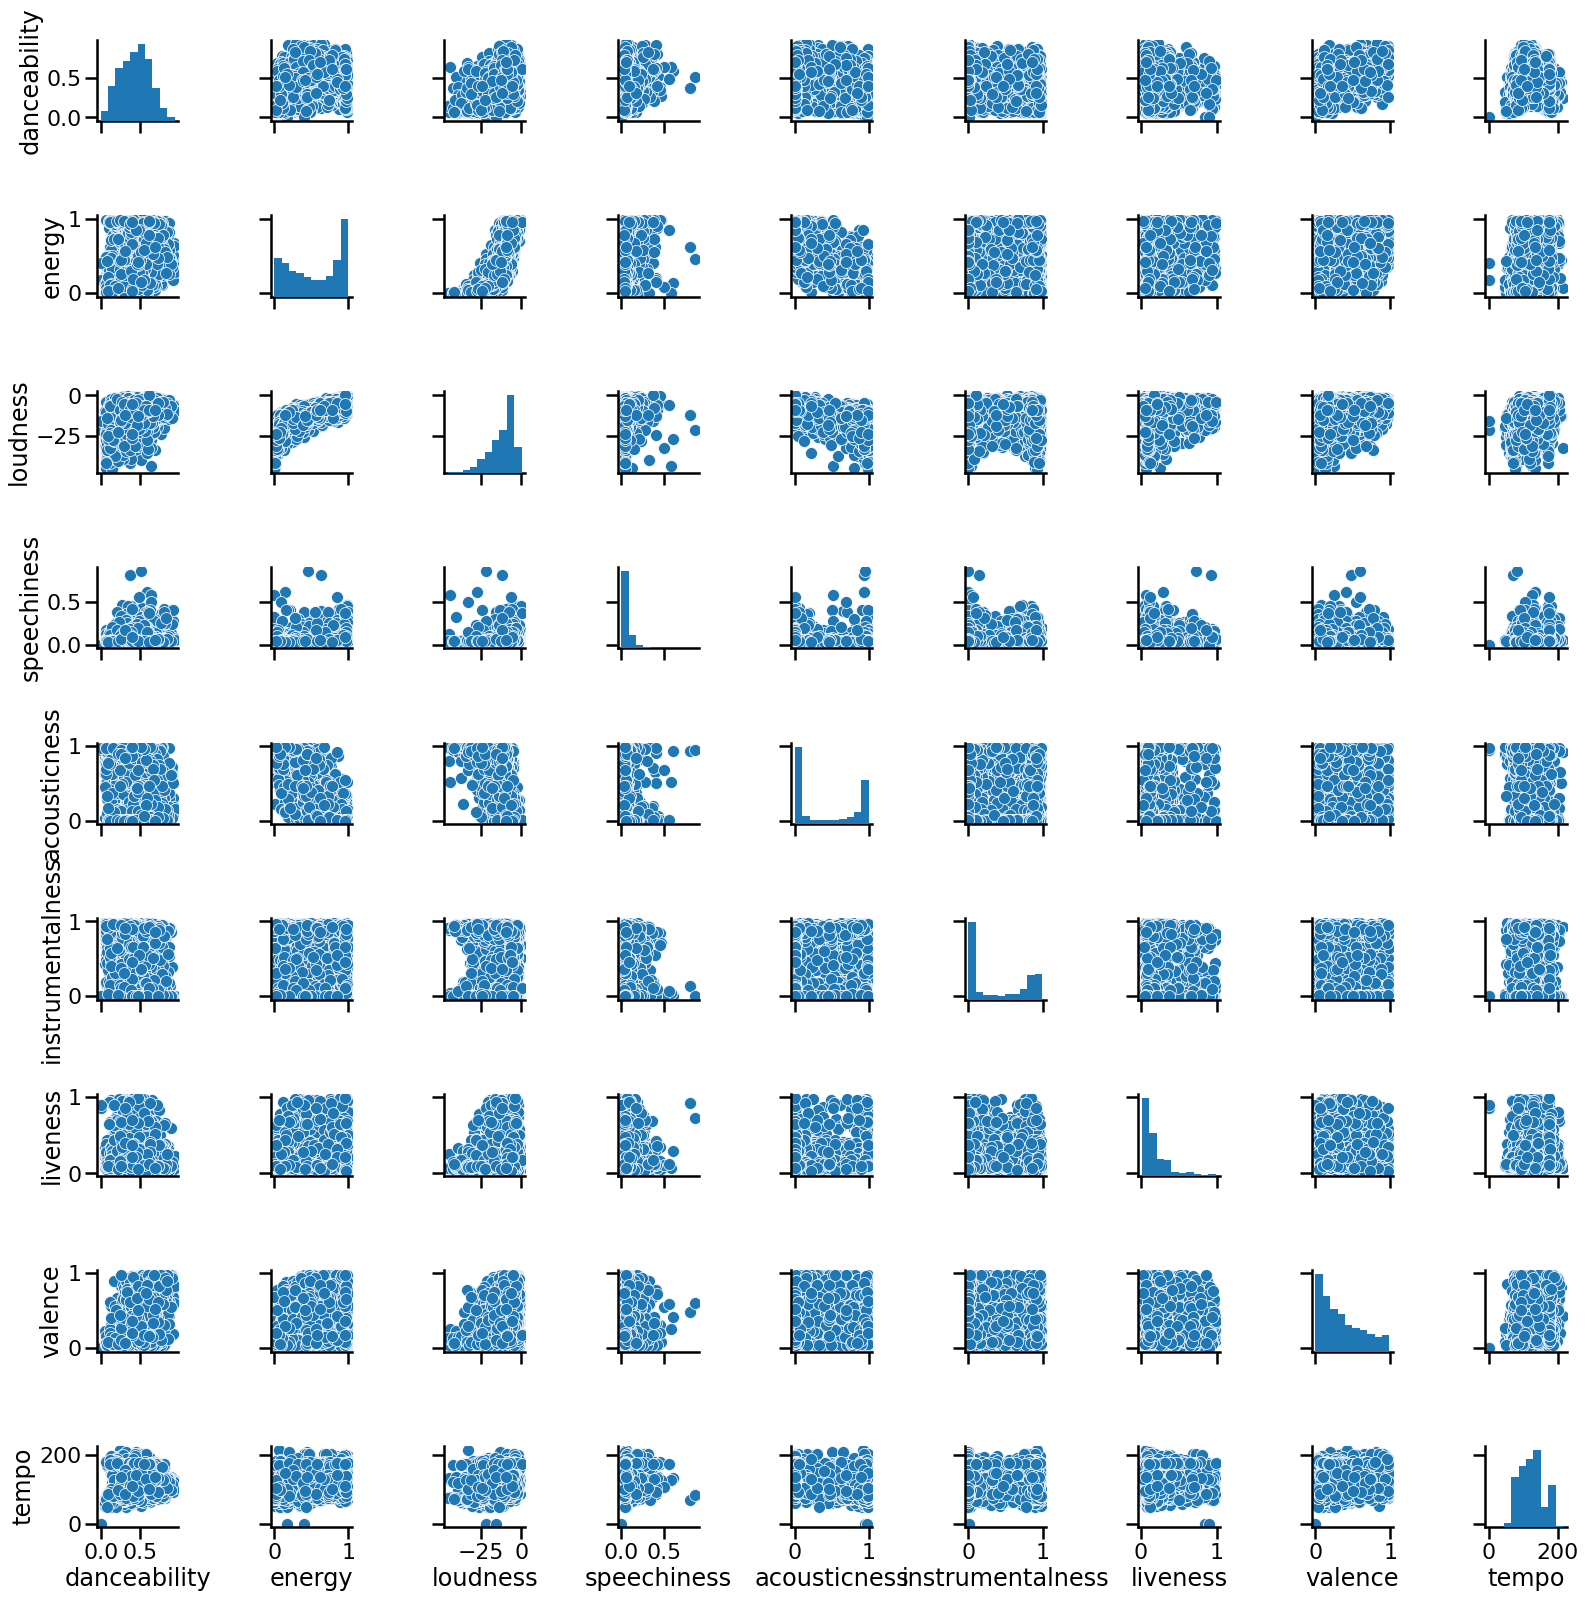

In [ ]:
#sns.pairplot(pd.concat([X_features,df_tracks.set_index('id')['artist_name']],axis=1),hue='artist_name');
sns.pairplot(X_features)
plt.tight_layout()

In [ ]:
df_af.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [ ]:
#math.log10(100)
import math
df_af['speechiness2']=np.log10(df_af['speechiness'])
df_af.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4270 entries, 6avAsaa2IsXHT2mtQ6cGVe to 4hdM3HKSCrdVK0hezMn1RL
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4270 non-null   float64
 1   energy            4270 non-null   float64
 2   key               4270 non-null   int64  
 3   loudness          4270 non-null   float64
 4   mode              4270 non-null   int64  
 5   speechiness       4270 non-null   float64
 6   acousticness      4270 non-null   float64
 7   instrumentalness  4270 non-null   float64
 8   liveness          4270 non-null   float64
 9   valence           4270 non-null   float64
 10  tempo             4270 non-null   float64
 11  type              4270 non-null   object 
 12  uri               4270 non-null   object 
 13  track_href        4270 non-null   object 
 14  analysis_url      4270 non-null   object 
 15  duration_ms       4270 non-null   int64  
 16  time_sig

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

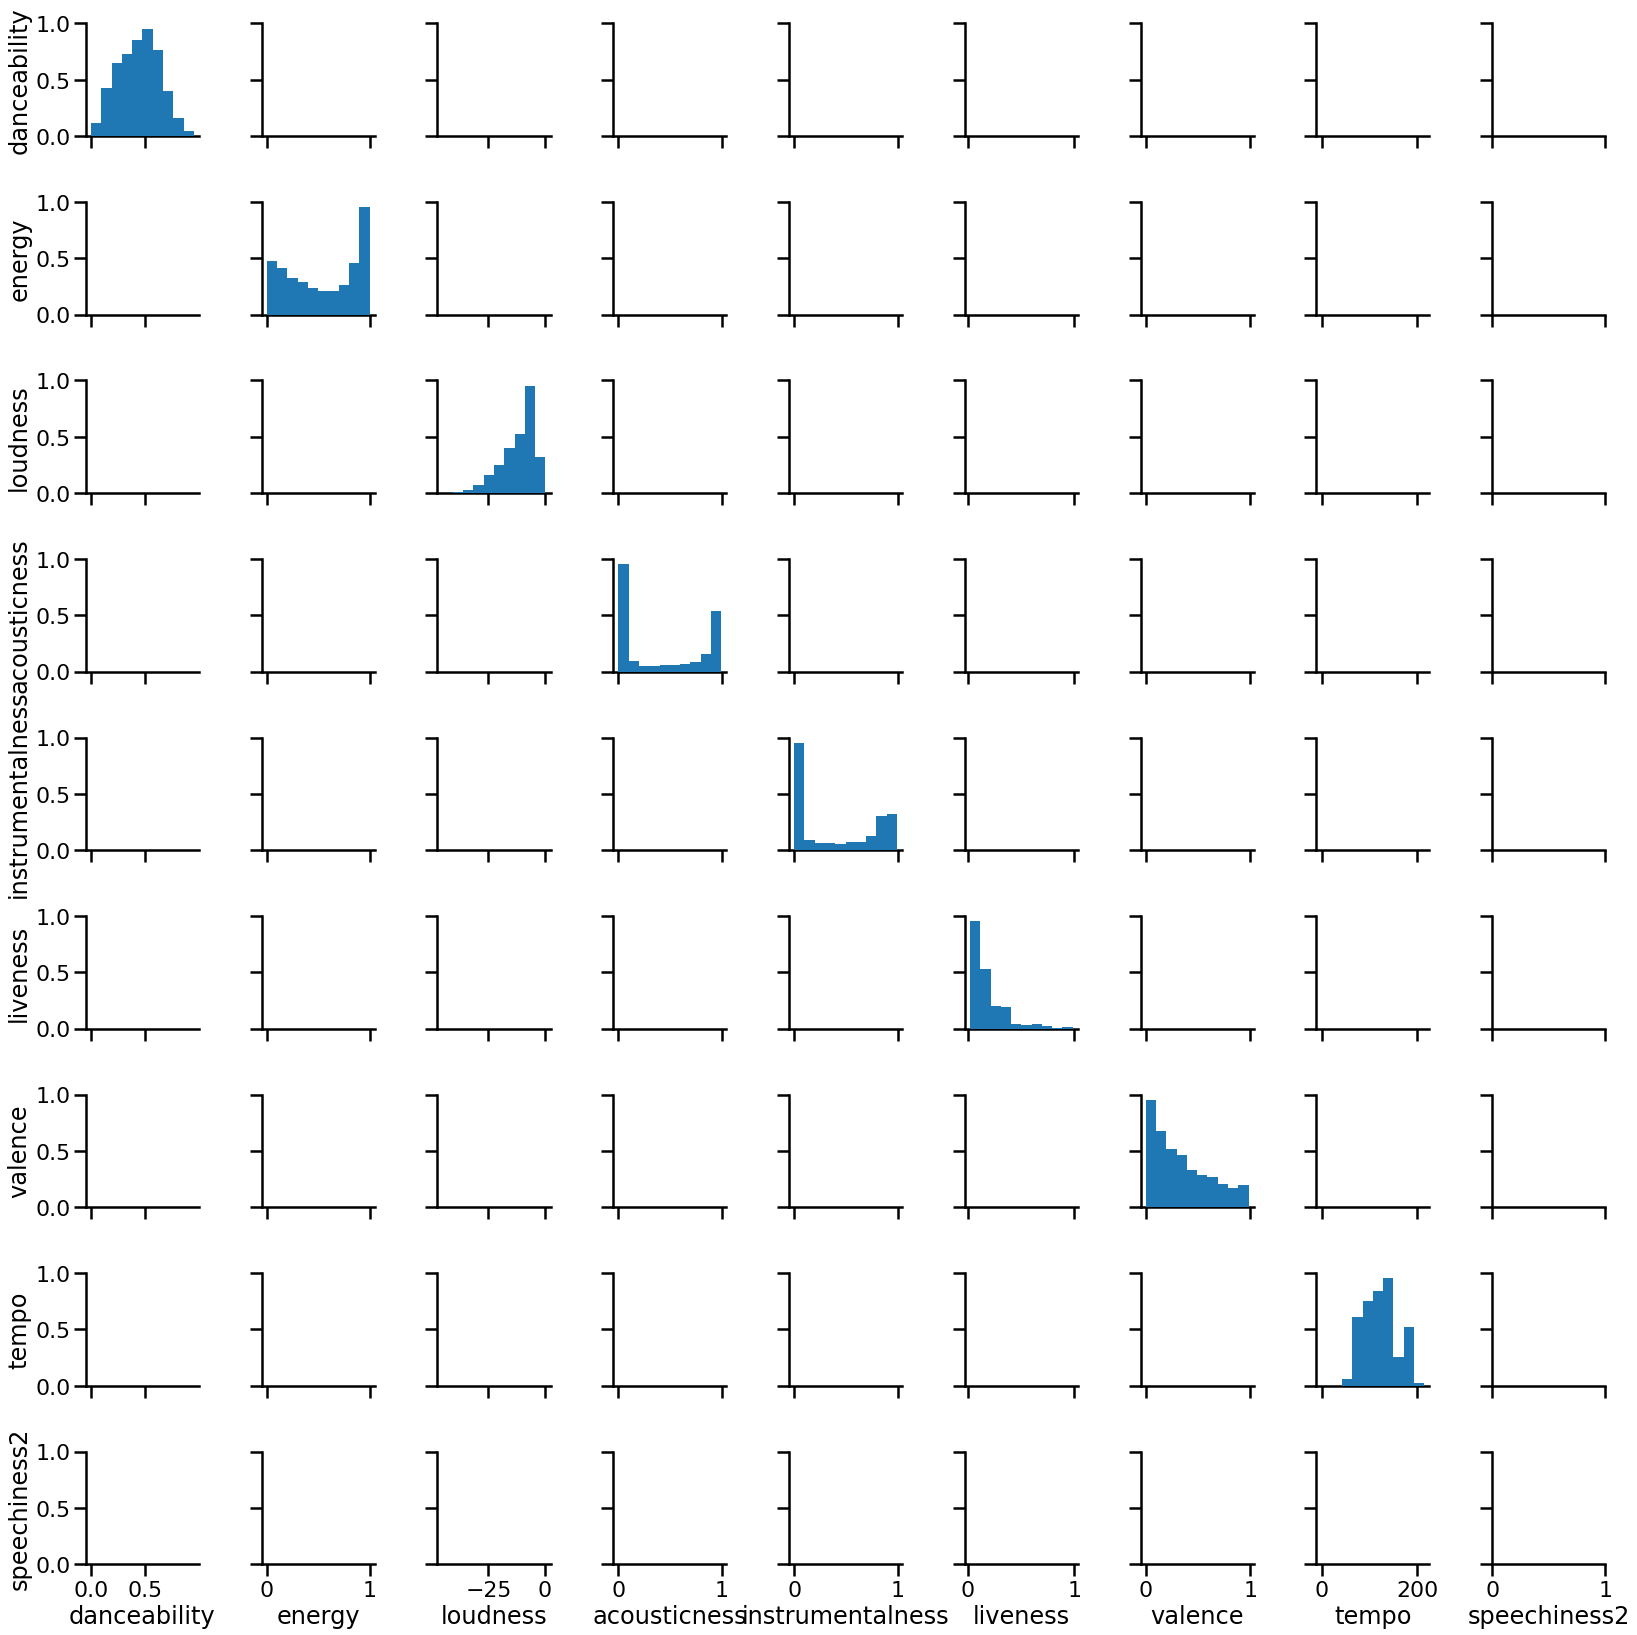

In [ ]:
X_features2 = df_af.iloc[:,[0,1,3,6,7,8,9,10,17]]
sns.pairplot(X_features2)
plt.tight_layout()